In [4]:
import numpy as np

import matplotlib.pyplot as plt

In [26]:
def get_file_data(csv, pos):
    csvf = open(csv, 'r')
    csvflines = csvf.readlines()
    csvf.close()
    
    data = []    
    for line in csvflines[1:]:
        values =  line.strip('\n[]').split(',')
        data.append(float(values[pos]))
        
    return data

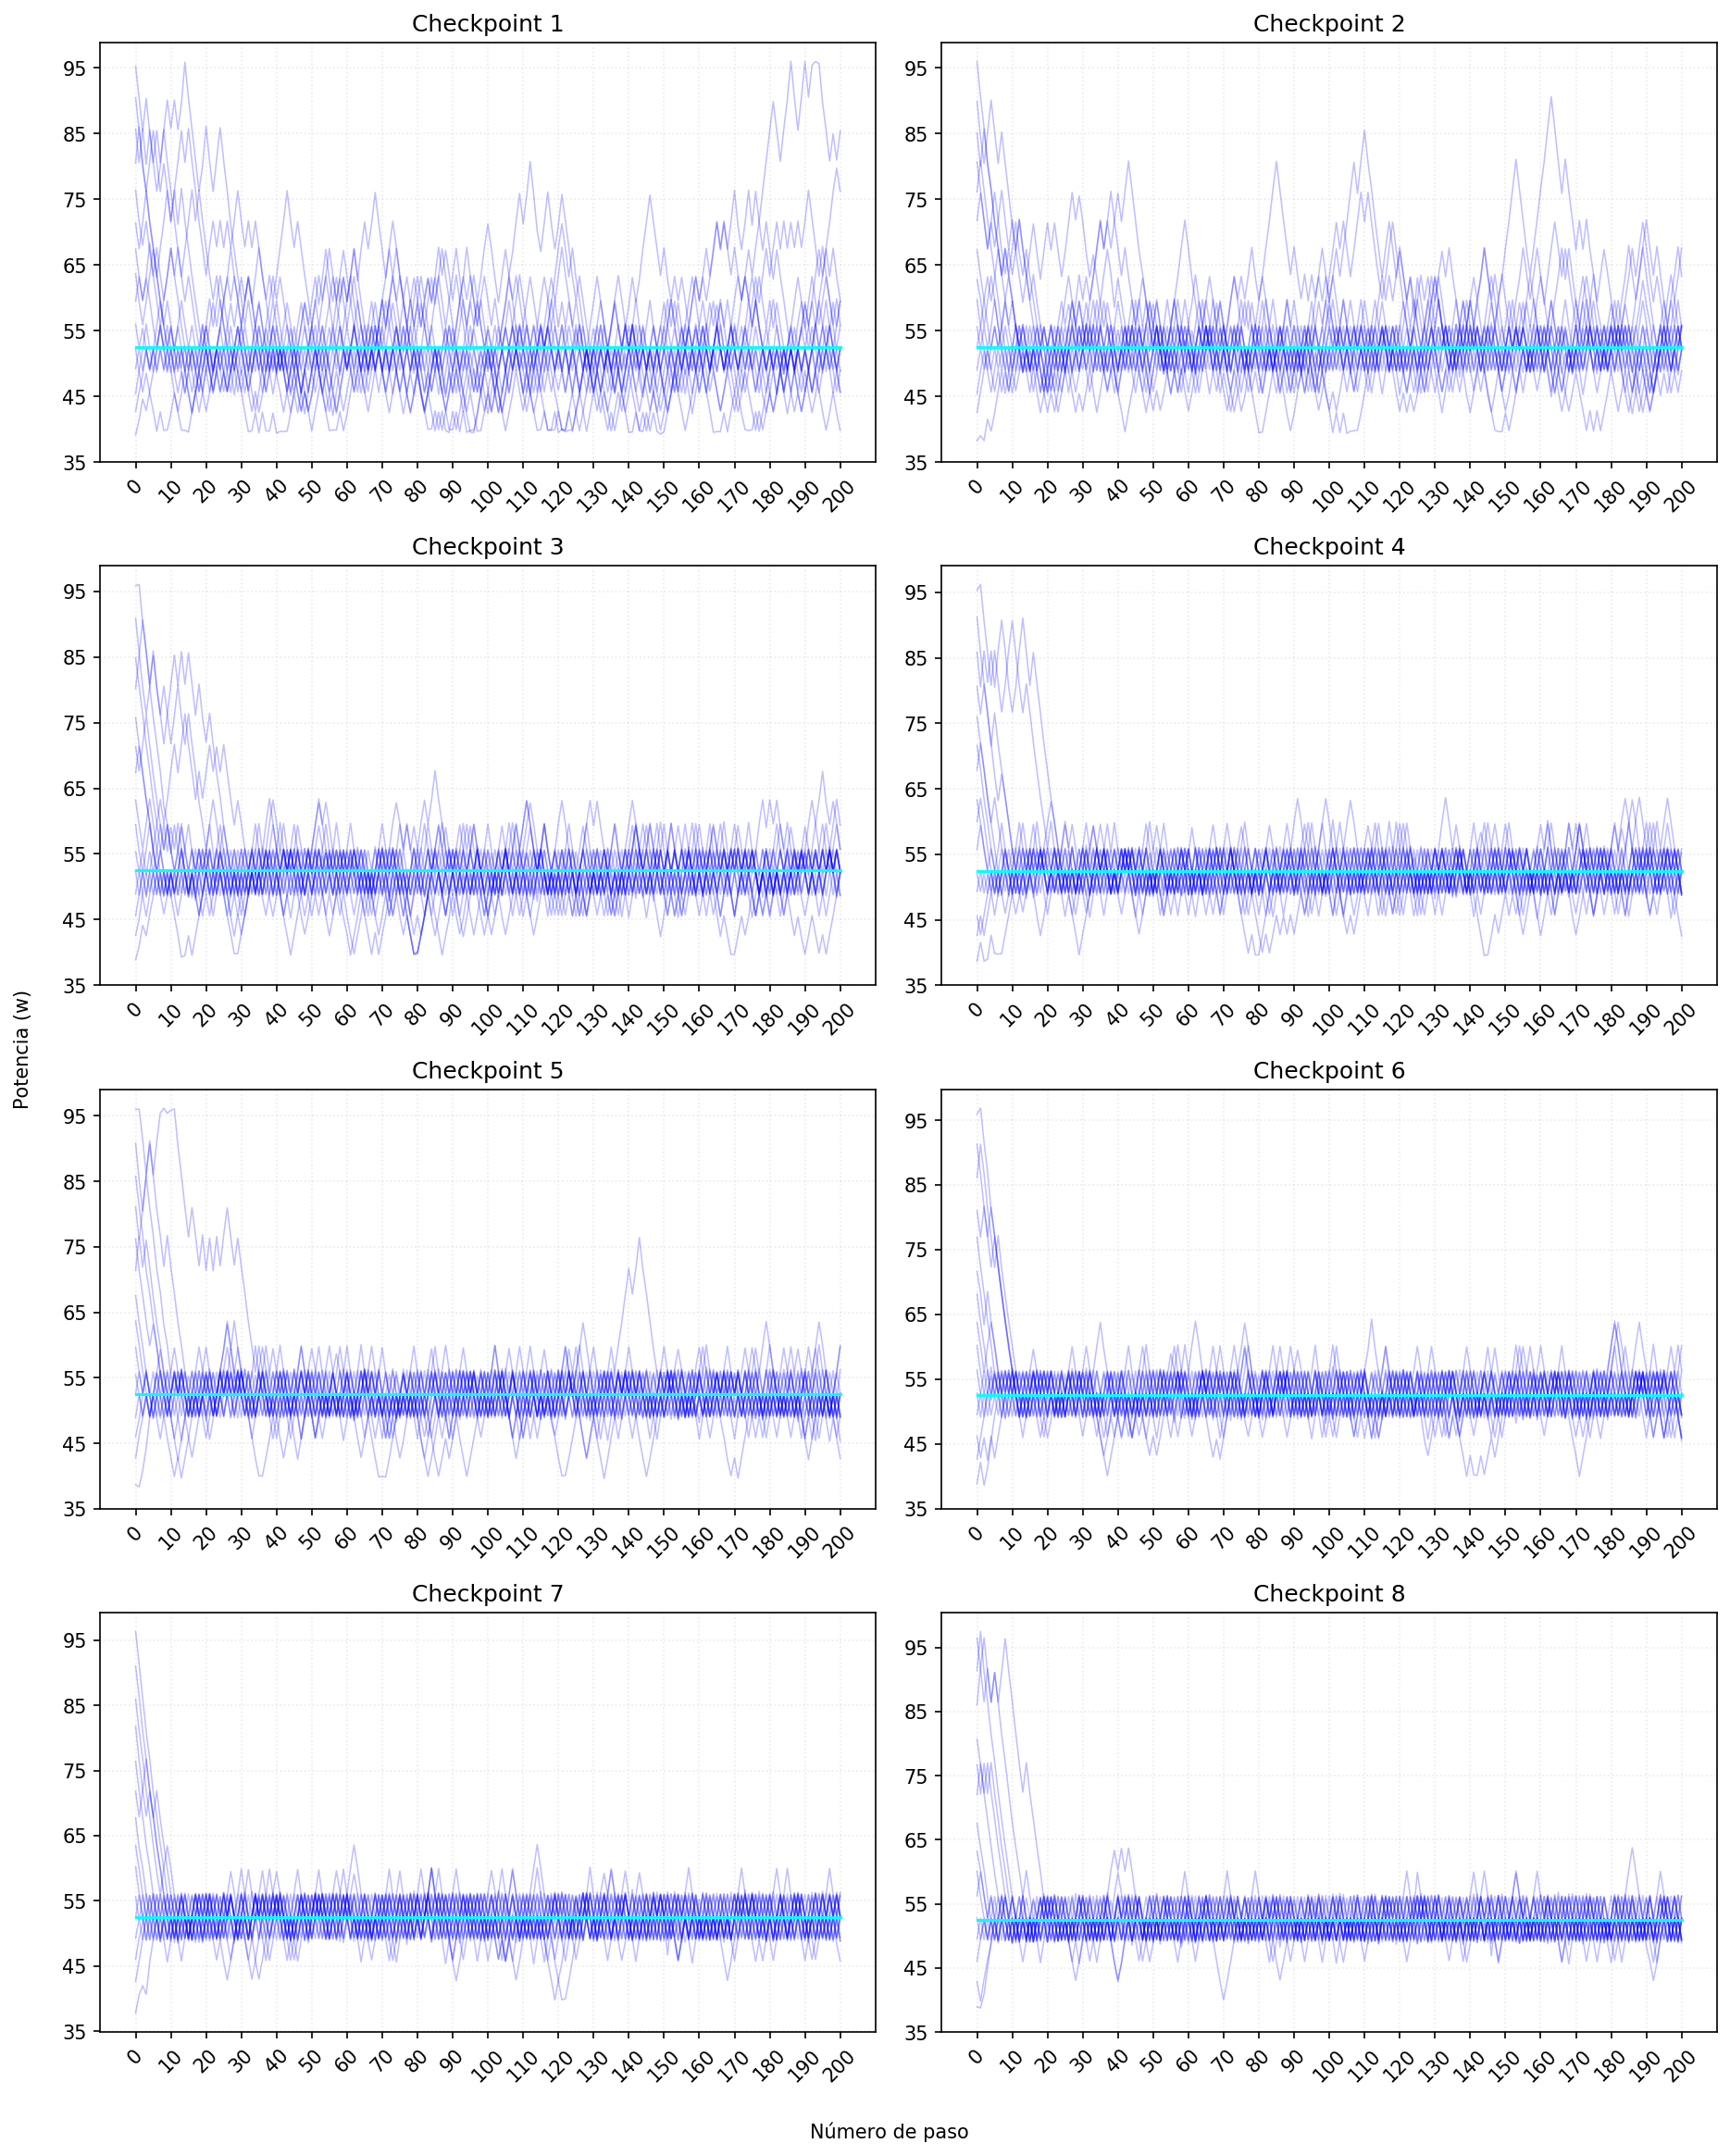

In [57]:
####################
### POWER GRAPHS ###
####################
key = 'power'
clr = 'blue'
pos = 8
X = range(0, 201)
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(35, 101, 10)

fig, axs = plt.subplots(4, 2, figsize=(12,15), dpi=150, constrained_layout=True)
for chkpt in range(8):
    ax = axs[chkpt // 2, chkpt % 2]

    ax.set_title(f'Checkpoint {chkpt + 1}')

    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt + 1}/iter-{it}.csv', pos)
        ax.plot(
            X, data, 
            color = clr,
            linestyle = '-',
            linewidth = 0.75,
            marker = '',
            alpha = 0.25
        )
        
    ax.axhline(
        y = 52.5, 
        xmin = 10 / 220, xmax = 1 - (10 / 220),
        color = 'cyan', 
        linestyle = '-',
        linewidth = 1.5,
    )

    ax.set_xticks(Xticks)
    ax.set_xticklabels(Xticks, rotation=45)
    
    ax.set_yticks(Yticks)

    ax.grid(
        alpha=0.25,
        linestyle=':',
    )
    
fig.text(0.5, -0.02, 'Número de paso', ha='center', va='center')
fig.text(-0.02, 0.5, 'Potencia (w)', ha='center', va='center', rotation='vertical')

plt.savefig(f'img/chkpts.{key}.png', bbox_inches='tight')

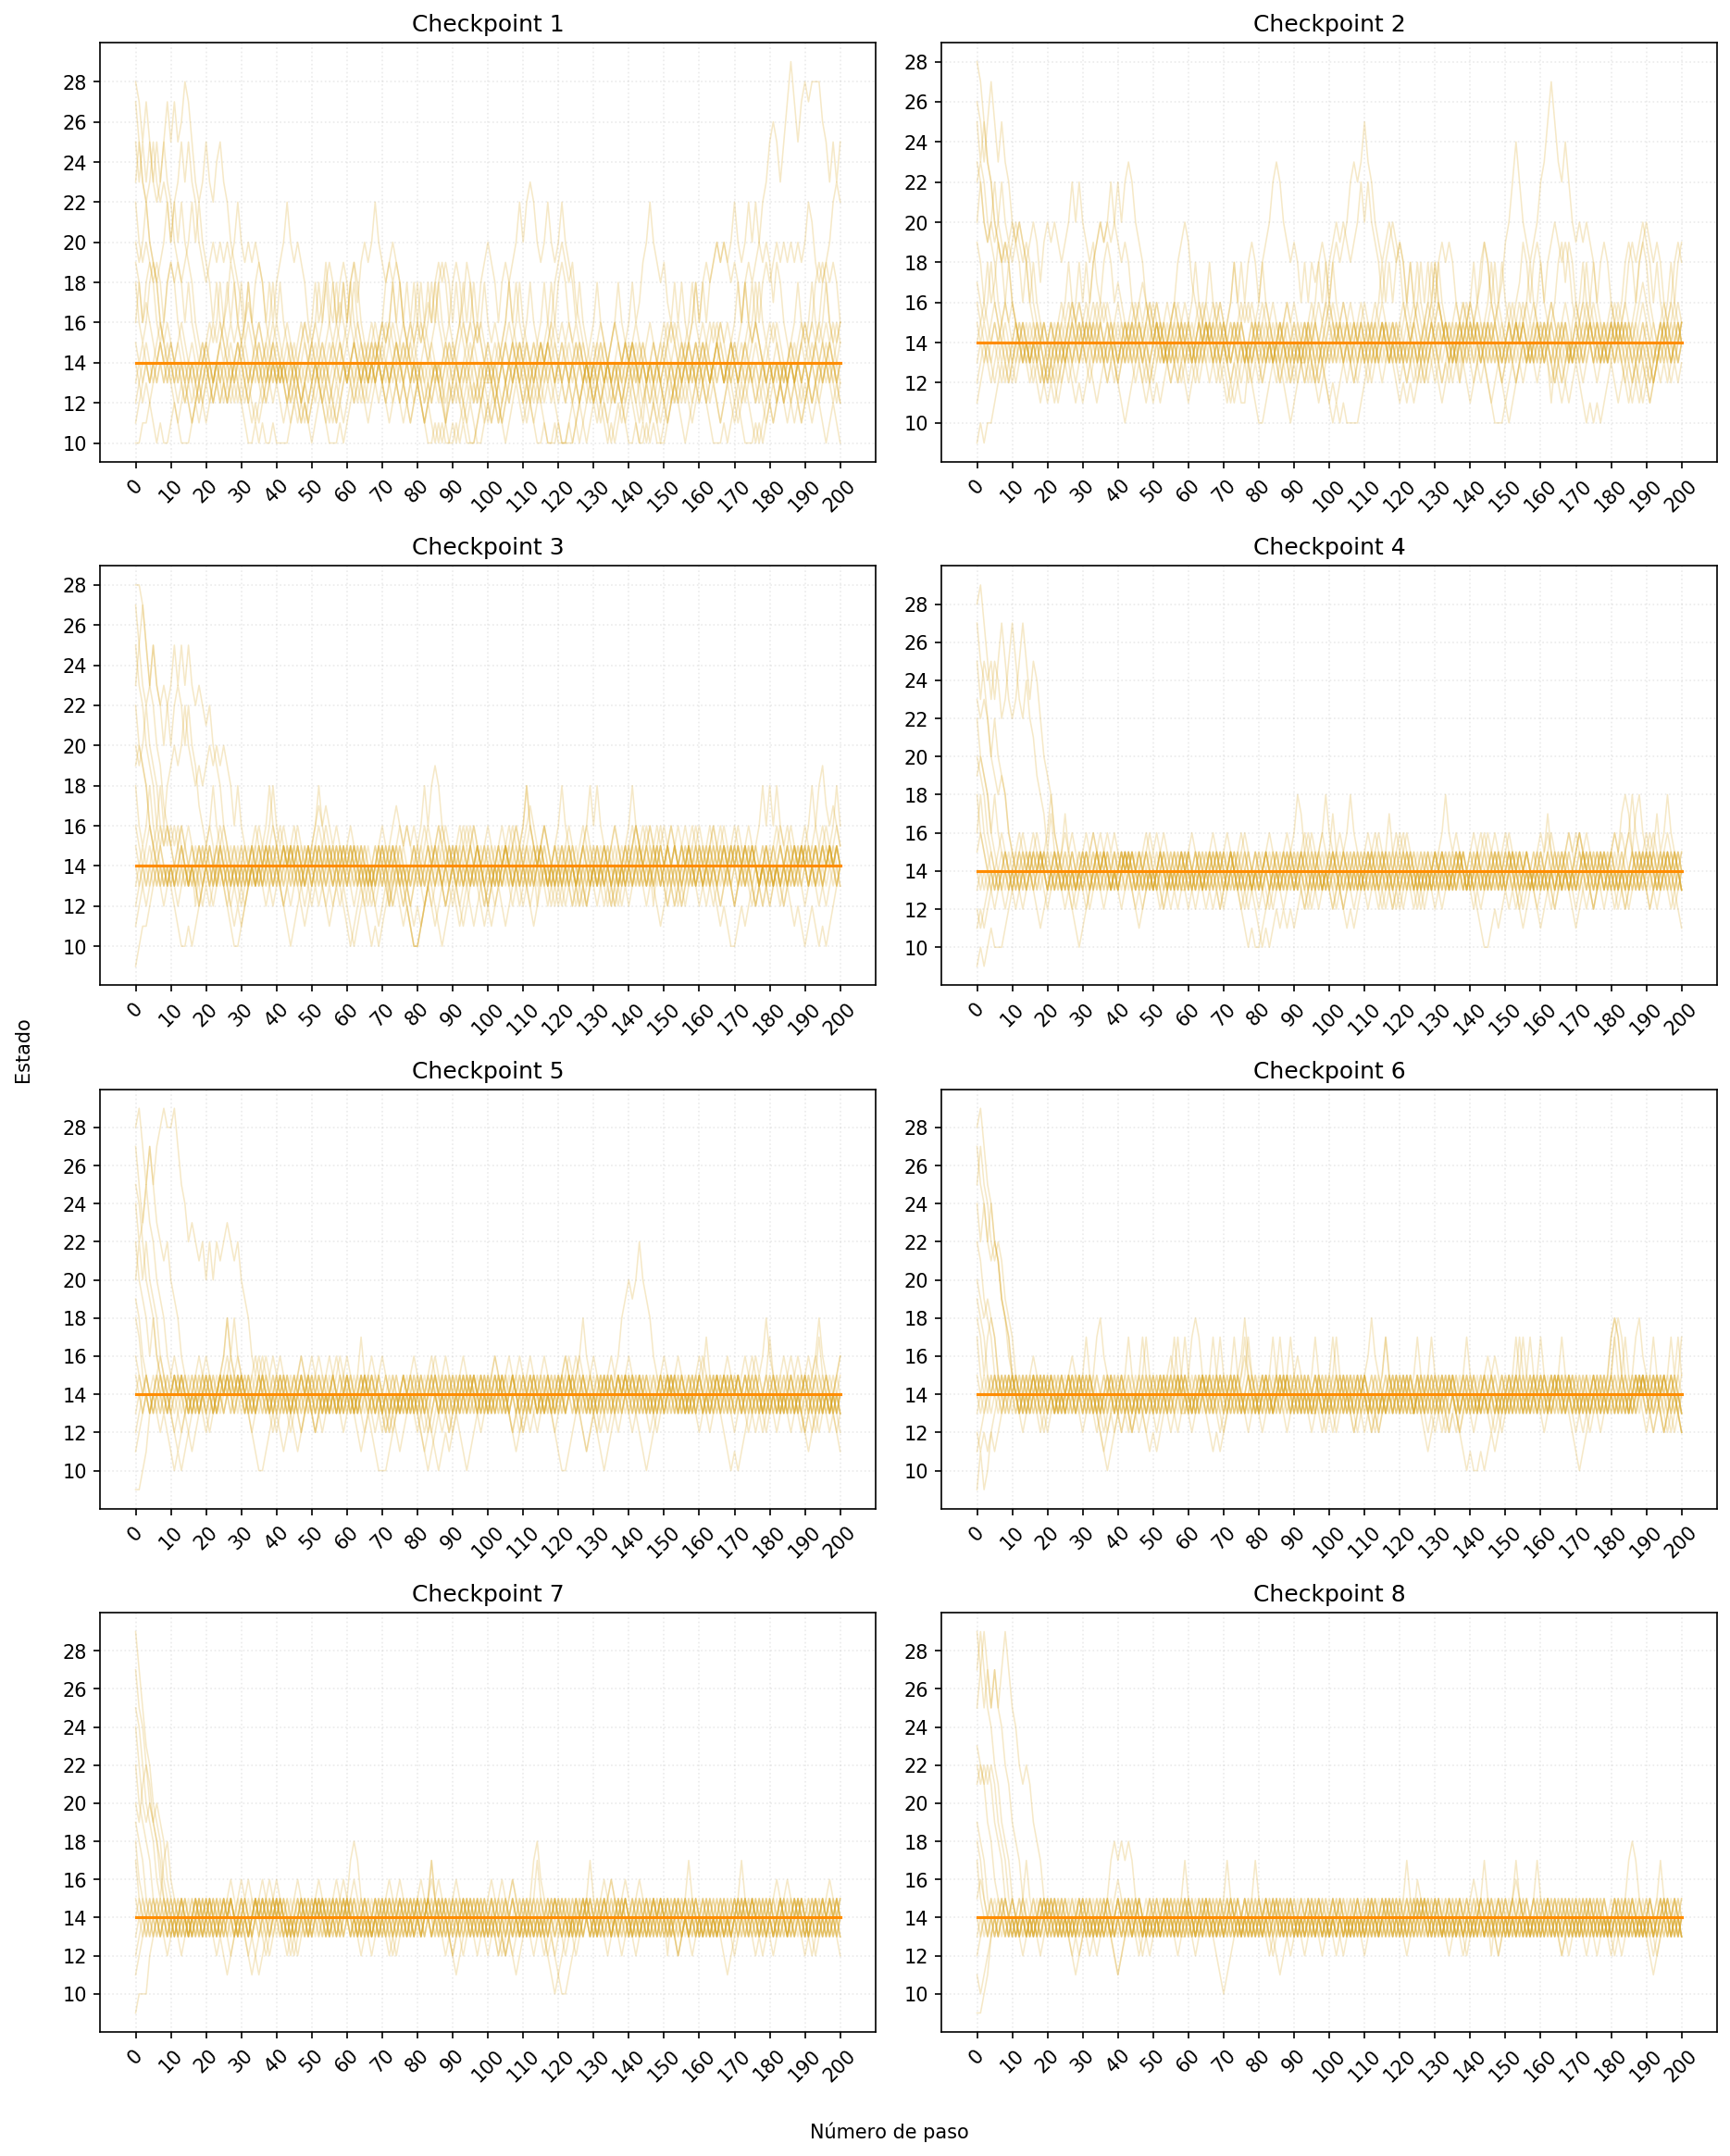

In [55]:
####################
### STATE GRAPHS ###
####################
key = 'state'
clr = 'goldenrod'
pos = 1
X = range(0, 201)
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(10, 29, 2)

fig, axs = plt.subplots(4, 2, figsize=(12,15), dpi=150, constrained_layout=True)
for chkpt in range(8):
    ax = axs[chkpt // 2, chkpt % 2]

    ax.set_title(f'Checkpoint {chkpt + 1}')

    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt + 1}/iter-{it}.csv', pos)
        ax.plot(
            X, data, 
            color = clr,
            linestyle = '-',
            linewidth = 0.75,
            marker = '',
            alpha = 0.25
        )
        
    ax.axhline(
        y = 14, 
        xmin = 10 / 220, xmax = 1 - (10 / 220),
        color = 'darkorange', 
        linestyle = '-',
        linewidth = 1.5,
    )

    ax.set_xticks(Xticks)
    ax.set_xticklabels(Xticks, rotation=45)
    
    ax.set_yticks(Yticks)

    ax.grid(
        alpha=0.25,
        linestyle=':',
    )
    
fig.text(0.5, -0.02, 'Número de paso', ha='center', va='center')
fig.text(-0.02, 0.5, 'Estado', ha='center', va='center', rotation='vertical')

plt.savefig(f'img/chkpts.{key}.png', bbox_inches='tight')

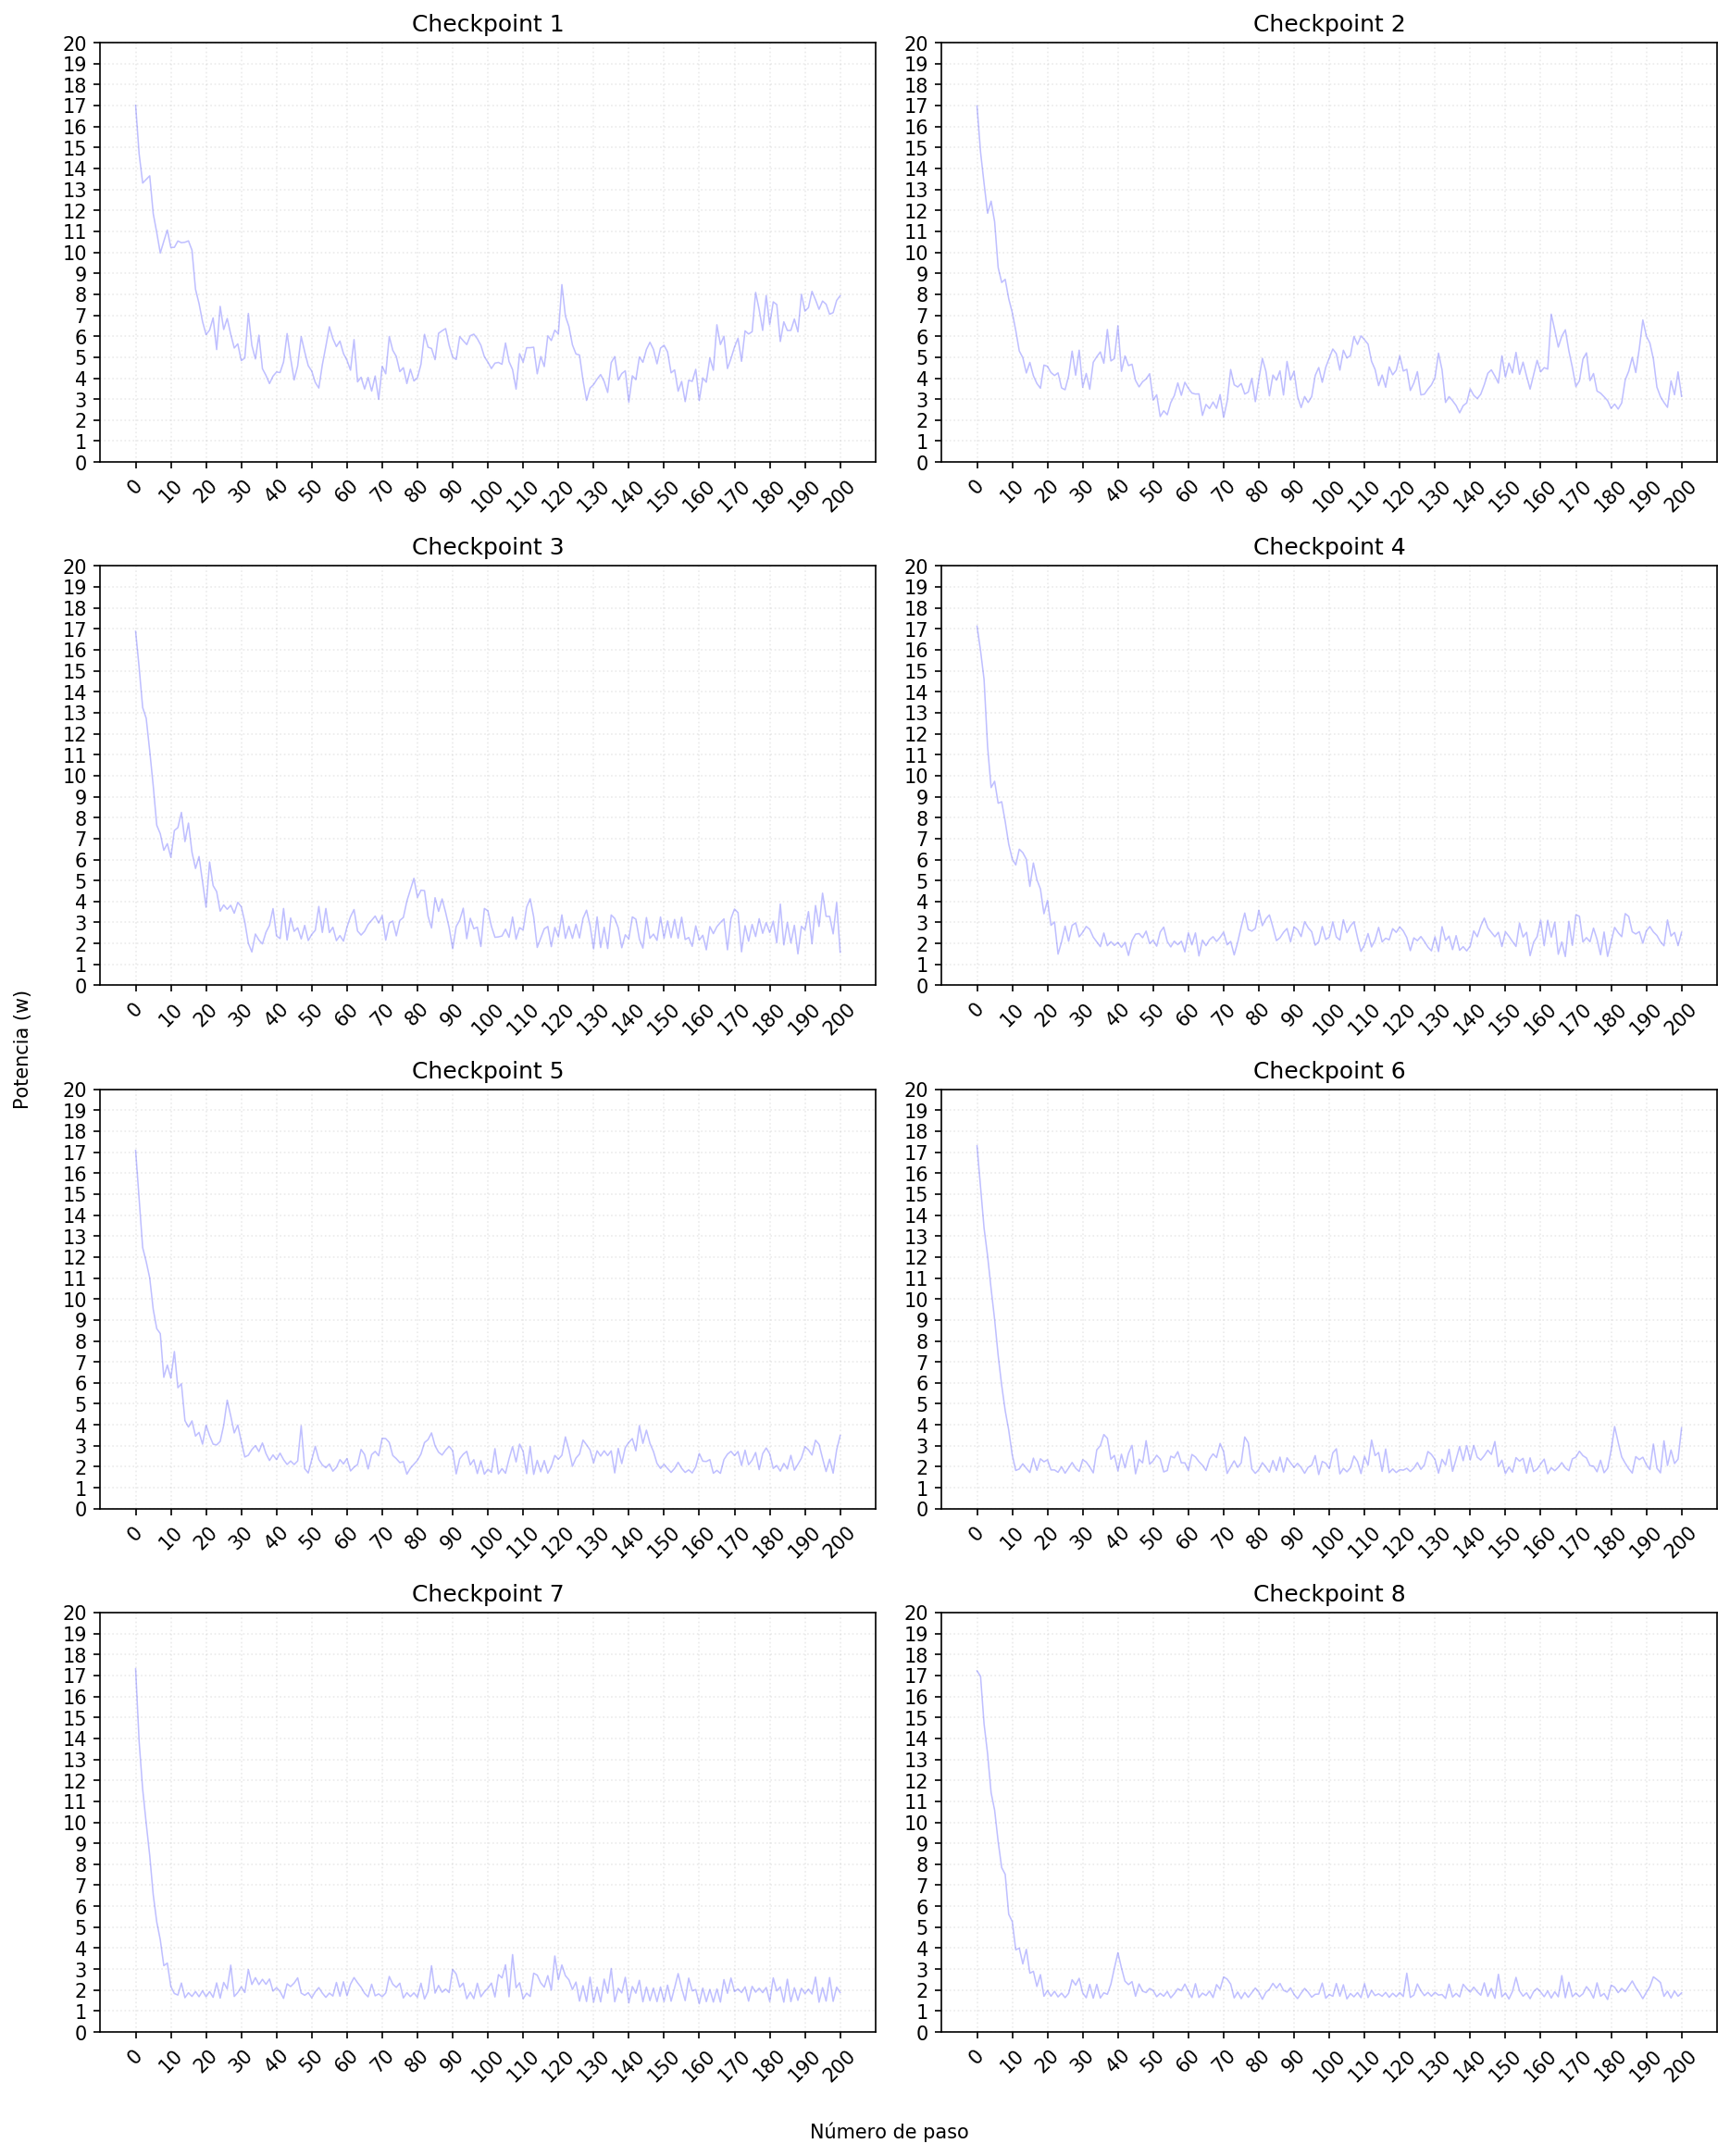

In [58]:
########################
### POWER MEAN ERROR ###
########################
key = 'power'
clr = 'blue'
pos = 8
target = 52.5
X = range(0, 201)
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(0, 21, 1)

fig, axs = plt.subplots(4, 2, figsize=(12,15), dpi=150, constrained_layout=True)
for chkpt in range(8):
    ax = axs[chkpt // 2, chkpt % 2]

    ax.set_title(f'Checkpoint {chkpt + 1}')
    
    bundle = []
    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt + 1}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    graph = bundle.mean(axis = 0)

    ax.plot(
        X, graph, 
        color = clr,
        linestyle = '-',
        linewidth = 0.75,
        marker = '',
        alpha = 1.0
    )
    
    ax.set_xticks(Xticks)
    ax.set_xticklabels(Xticks, rotation=45)
    
    ax.set_yticks(Yticks)

    ax.grid(
        alpha=0.25,
        linestyle=':',
    )
    
fig.text(0.5, -0.02, 'Número de paso', ha='center', va='center')
fig.text(-0.02, 0.5, 'Potencia (w)', ha='center', va='center', rotation='vertical')

plt.savefig(f'img/chkpts.{key}.error.mean.png', bbox_inches='tight')

In [ ]:
###################################################################

In [104]:
Xticks = np.arange(0, 201, 10)
Yticks = {}
Yticks['power'] = np.arange(10.0, 130.0, 10.0)
Yticks['power_error'] = np.arange(0, 60, 5)
Yticks['power_mean_error'] = np.arange(0, 13, 2)

Yticks['frequency'] = np.arange(1200000, 2601000, 200000)
Yticks['frequency_error'] = np.arange(0, 1400001, 200000)
Yticks['frequency_mean_error'] = np.arange(0, 700001, 100000)

Yticks['state'] = np.arange(0, 37, 3)
Yticks['state_error'] = np.arange(0, 21, 2)
Yticks['state_mean_error'] = np.arange(0, 6, 1)

Yticks['acc_reward'] = np.arange(-25, 101, 25)
Yticks['reward'] = [-1, 0, 1, 2]

In [ ]:
###################################################################
###################################################################

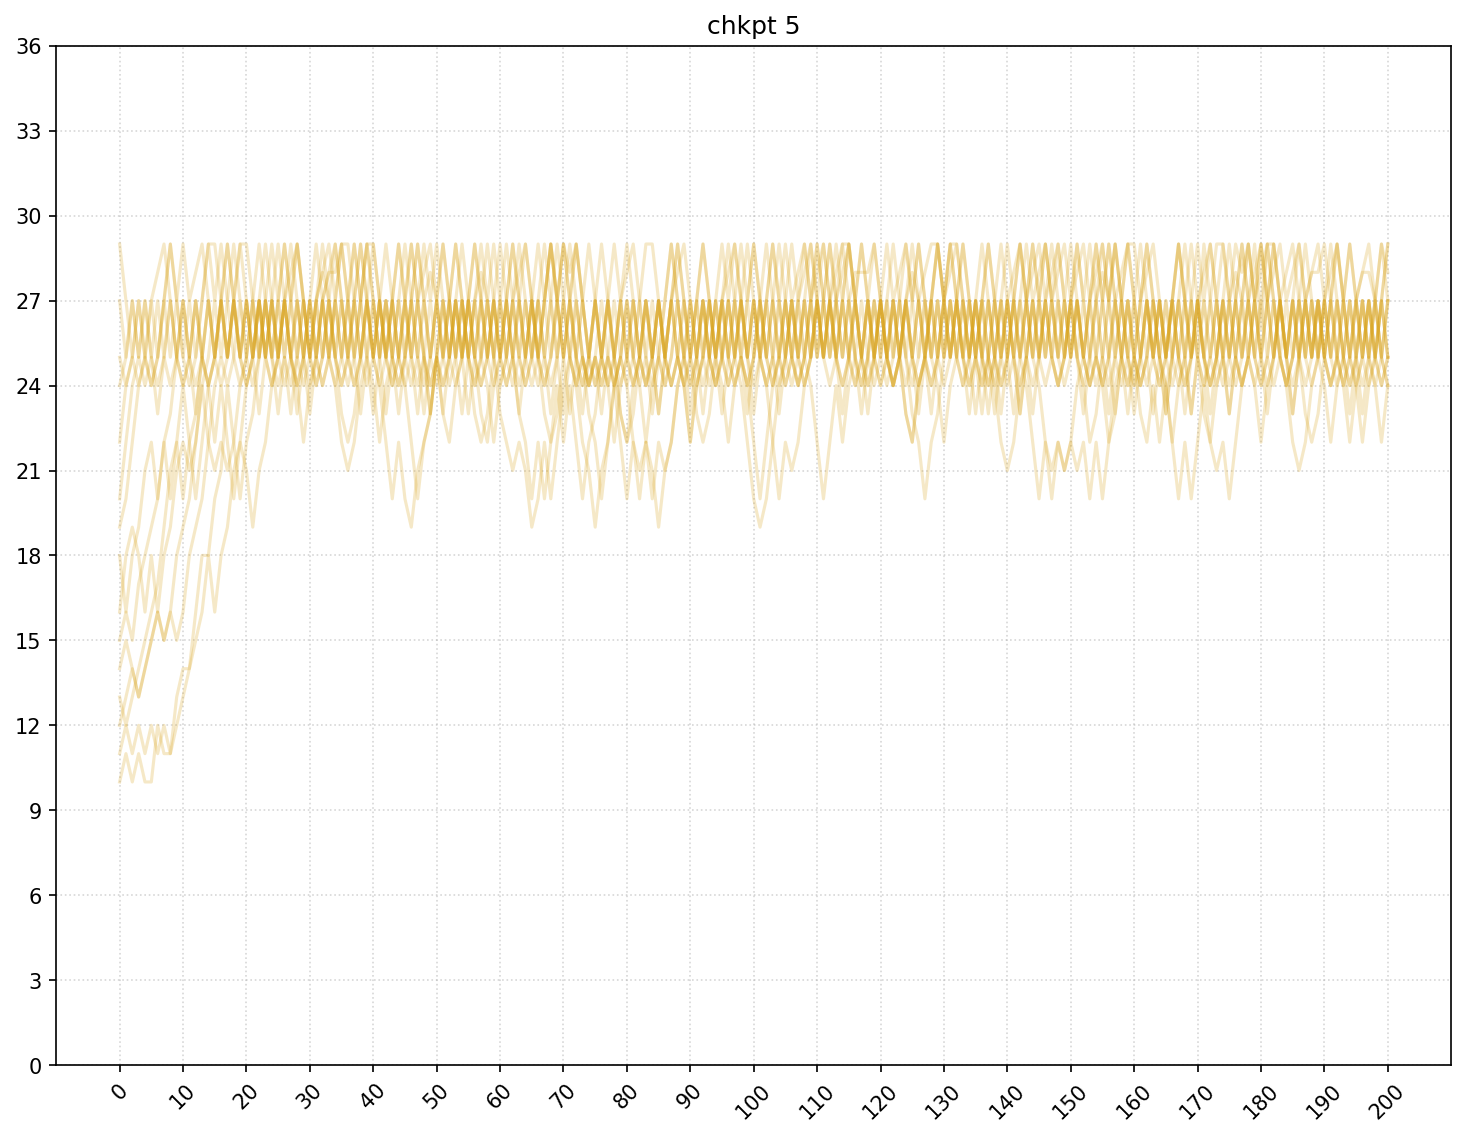

In [39]:
# Data (1 checkpoint)
key = 'state'
clr = 'goldenrod'

chkpt = 5

fig = plt.figure(figsize=(12,9), dpi=150)

ax = fig.add_subplot(111)
ax.set_title(f'chkpt {chkpt}')

for it in range(15):
    data = get_file_data(f'checkpoint-{chkpt}/iter-{it}.csv')
    ax.plot(
        data['Step'], data[key], 
        color = clr, 
        label = f'iter {it}',
        linestyle = '-',
        marker = '',
        alpha = 0.25
    )

#ax.set_xlabel('Step')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

#ax.set_ylabel('Power (w)')
ax.set_yticks(Yticks[key])

ax.grid(
    alpha=0.50,
    linestyle=':',
)

figpath = localdir + f'img/chkpt-{chkpt}.{key}.png'
plt.savefig(figpath, bbox_inches='tight')

In [ ]:
###################################################################

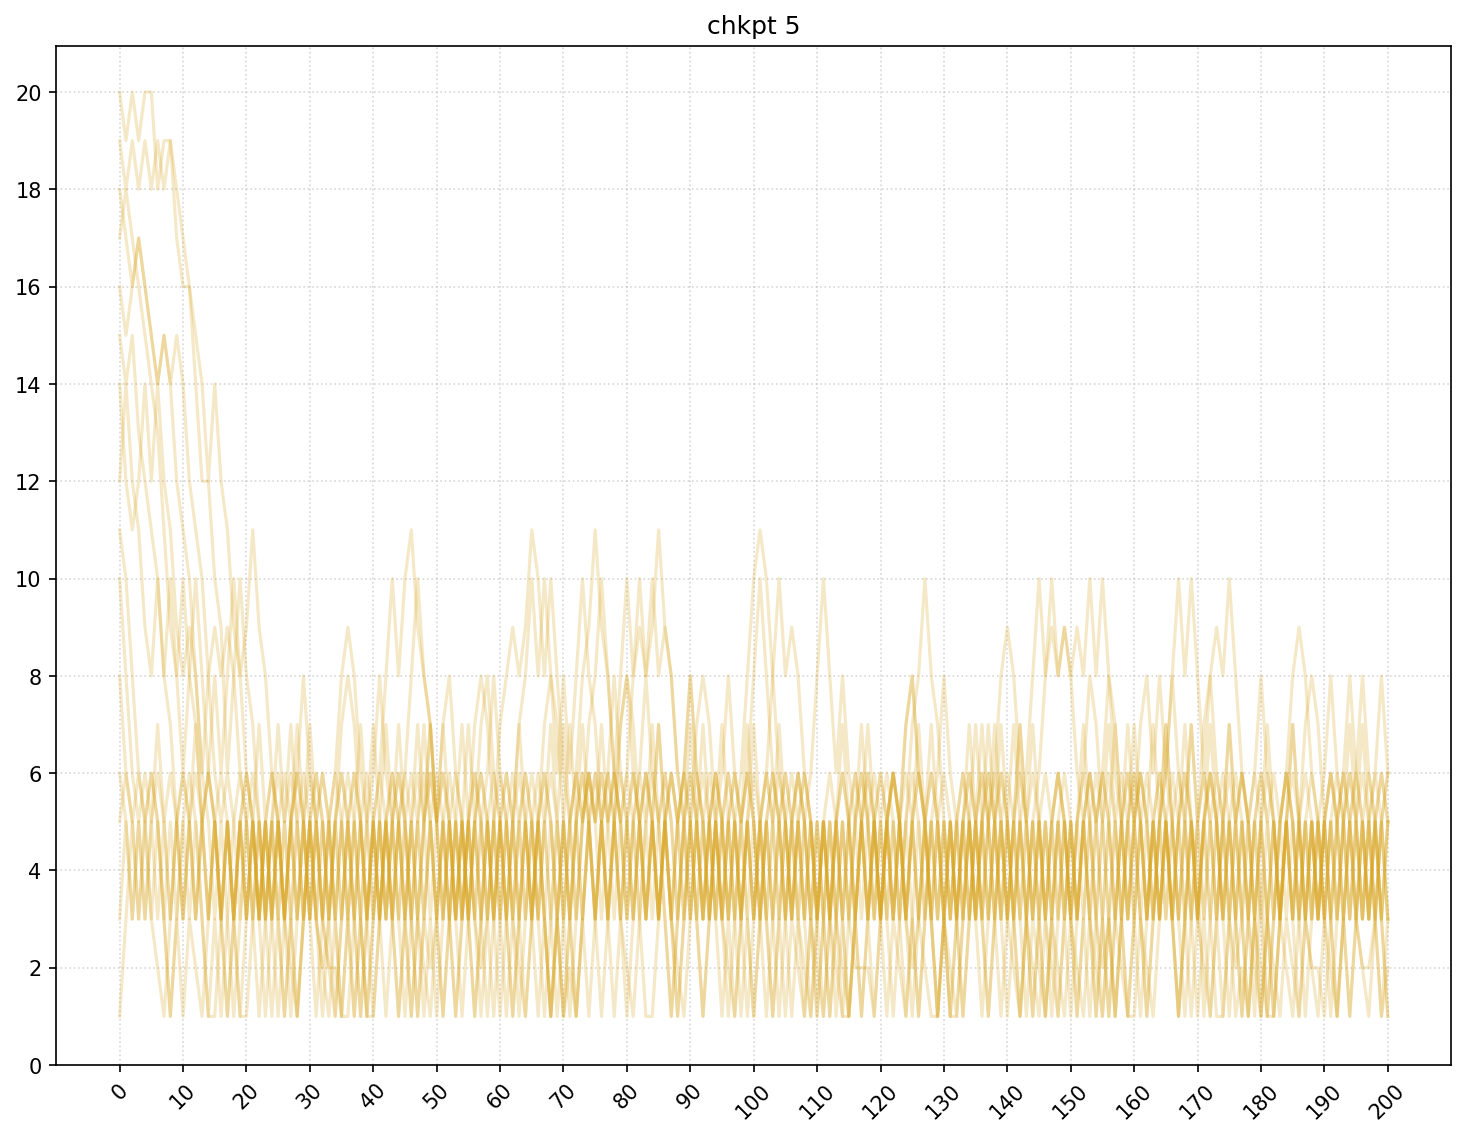

In [45]:
# Data error (1 checkpoint)
key = 'state'
clr = 'goldenrod'
# target = 100.0 #power
# target = 2600000 #freq
target = 30 #state

chkpt = 5

fig = plt.figure(figsize=(12,9), dpi=150)

ax = fig.add_subplot(111)
ax.set_title(f'chkpt {chkpt}')

for it in range(15):
    data = get_file_data(f'checkpoint-{chkpt}/iter-{it}.csv')
    graph = [ abs(x - target) for x in data[key] ]
    ax.plot(
        data['Step'], graph, 
        color = clr, 
        label = f'iter {it}',
        linestyle = '-',
        marker = '',
        alpha = 0.25
    )

#ax.set_xlabel('Step')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

#ax.set_ylabel('Power (w)')
ax.set_yticks(Yticks[f'{key}_error'])

ax.grid(
    alpha=0.50,
    linestyle=':',
)

figpath = localdir + f'img/chkpt-{chkpt}.{key}.error.png'
plt.savefig(figpath, bbox_inches='tight')

In [ ]:
###################################################################

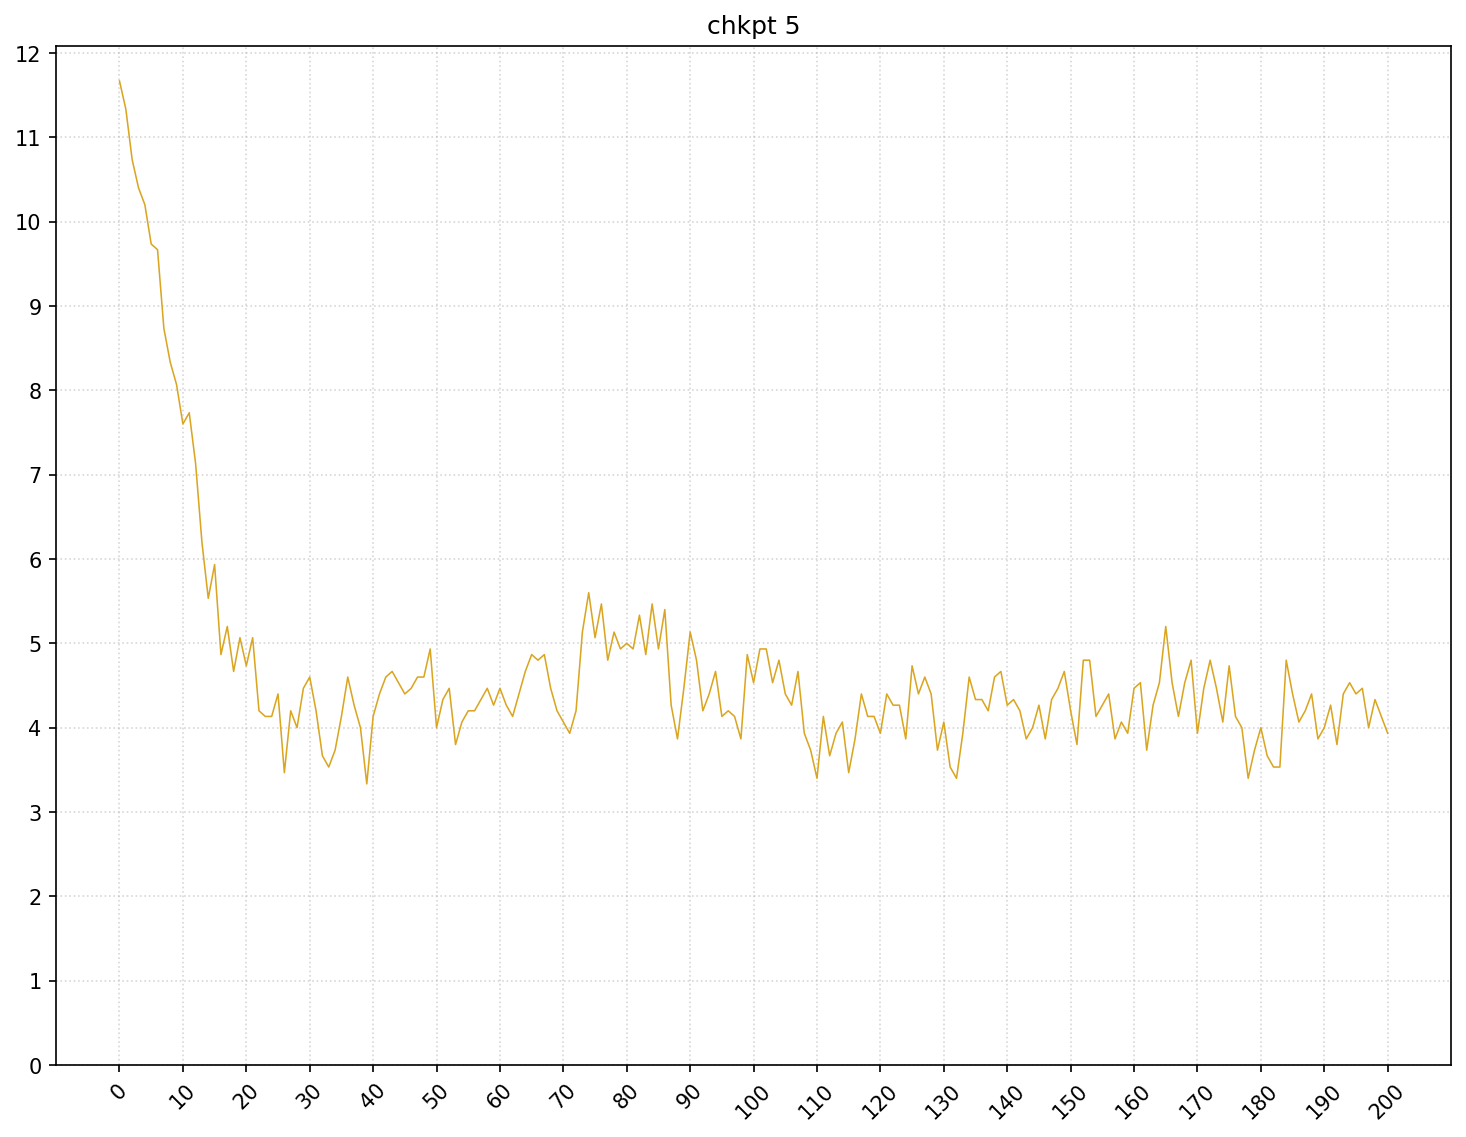

In [62]:
# Data mean error (1 checkpoint)
key = 'state'
clr = 'goldenrod'
# target = 100.0 #power
# target = 2600000 #freq
target = 30 #state

chkpt = 5

fig = plt.figure(figsize=(12,9), dpi=150)

ax = fig.add_subplot(111)
ax.set_title(f'chkpt {chkpt}')

bundle = []
for it in range(15):
    data = get_file_data(f'checkpoint-{chkpt}/iter-{it}.csv')
    bundle.append([ abs(x - target) for x in data[key] ])
bundle = np.array(bundle)
graph = bundle.mean(axis = 0)

ax.plot(
    data['Step'], graph, 
    color = clr, 
    label = f'chkpt {chkpt + 1}',
    linestyle = '-',
    linewidth = 0.75,
    marker = '',
    alpha = 1.0
)

#ax.set_xlabel('Step')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

#ax.set_ylabel('Power (w)')
ax.set_yticks(Yticks[f'{key}_mean_error'])

ax.grid(
    alpha=0.50,
    linestyle=':',
)

figpath = localdir + f'img/chkpt-{chkpt}.{key}.mean.error.png'
plt.savefig(figpath, bbox_inches='tight')

In [ ]:
###################################################################
###################################################################

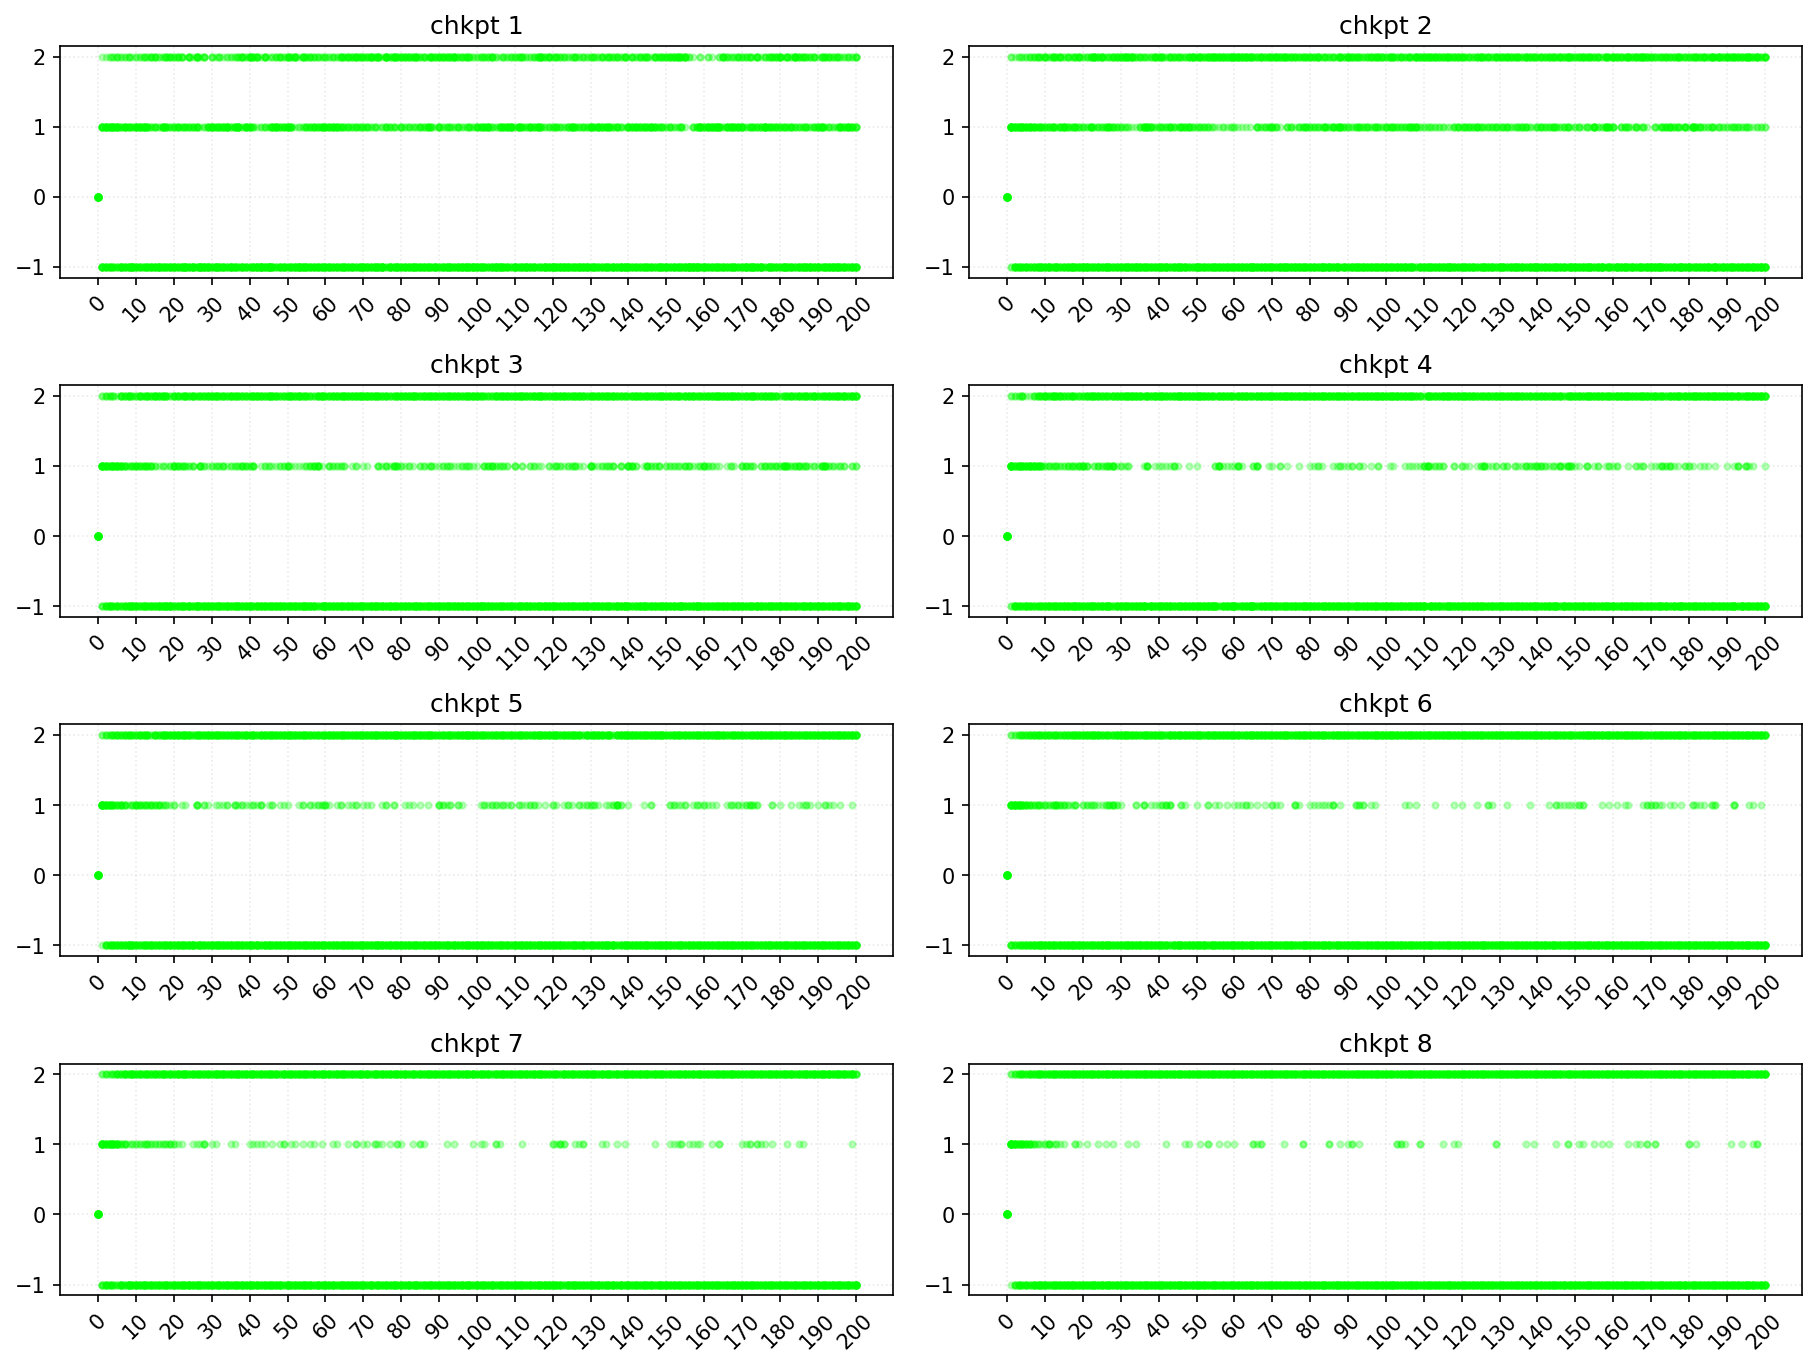

In [109]:
# Data chkpt bundle
key = 'reward'
clr = 'lime'

fig, axs = plt.subplots(4, 2, figsize=(12,9), dpi=150, constrained_layout=True)
for chkpt in range(8):
    ax = axs[chkpt // 2, chkpt % 2]

    ax.set_title(f'chkpt {chkpt + 1}')

    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt + 1}/iter-{it}.csv')
        ax.plot(
            data['Step'], data[key], 
            color = clr, 
            label = f'iter {it}',
            linestyle = '',
            linewidth = 0.75,
            marker = '.',
            alpha = 0.25
        )

    #ax.set_xlabel('Step')
    ax.set_xticks(Xticks)
    ax.set_xticklabels(Xticks, rotation=45)

    #ax.set_ylabel('Power (w)')
    ax.set_yticks(Yticks[key])

    ax.grid(
        alpha=0.25,
        linestyle=':',
    )

plt.savefig(f'img/chkpts.{key}.png', bbox_inches='tight')

In [ ]:
###################################################################

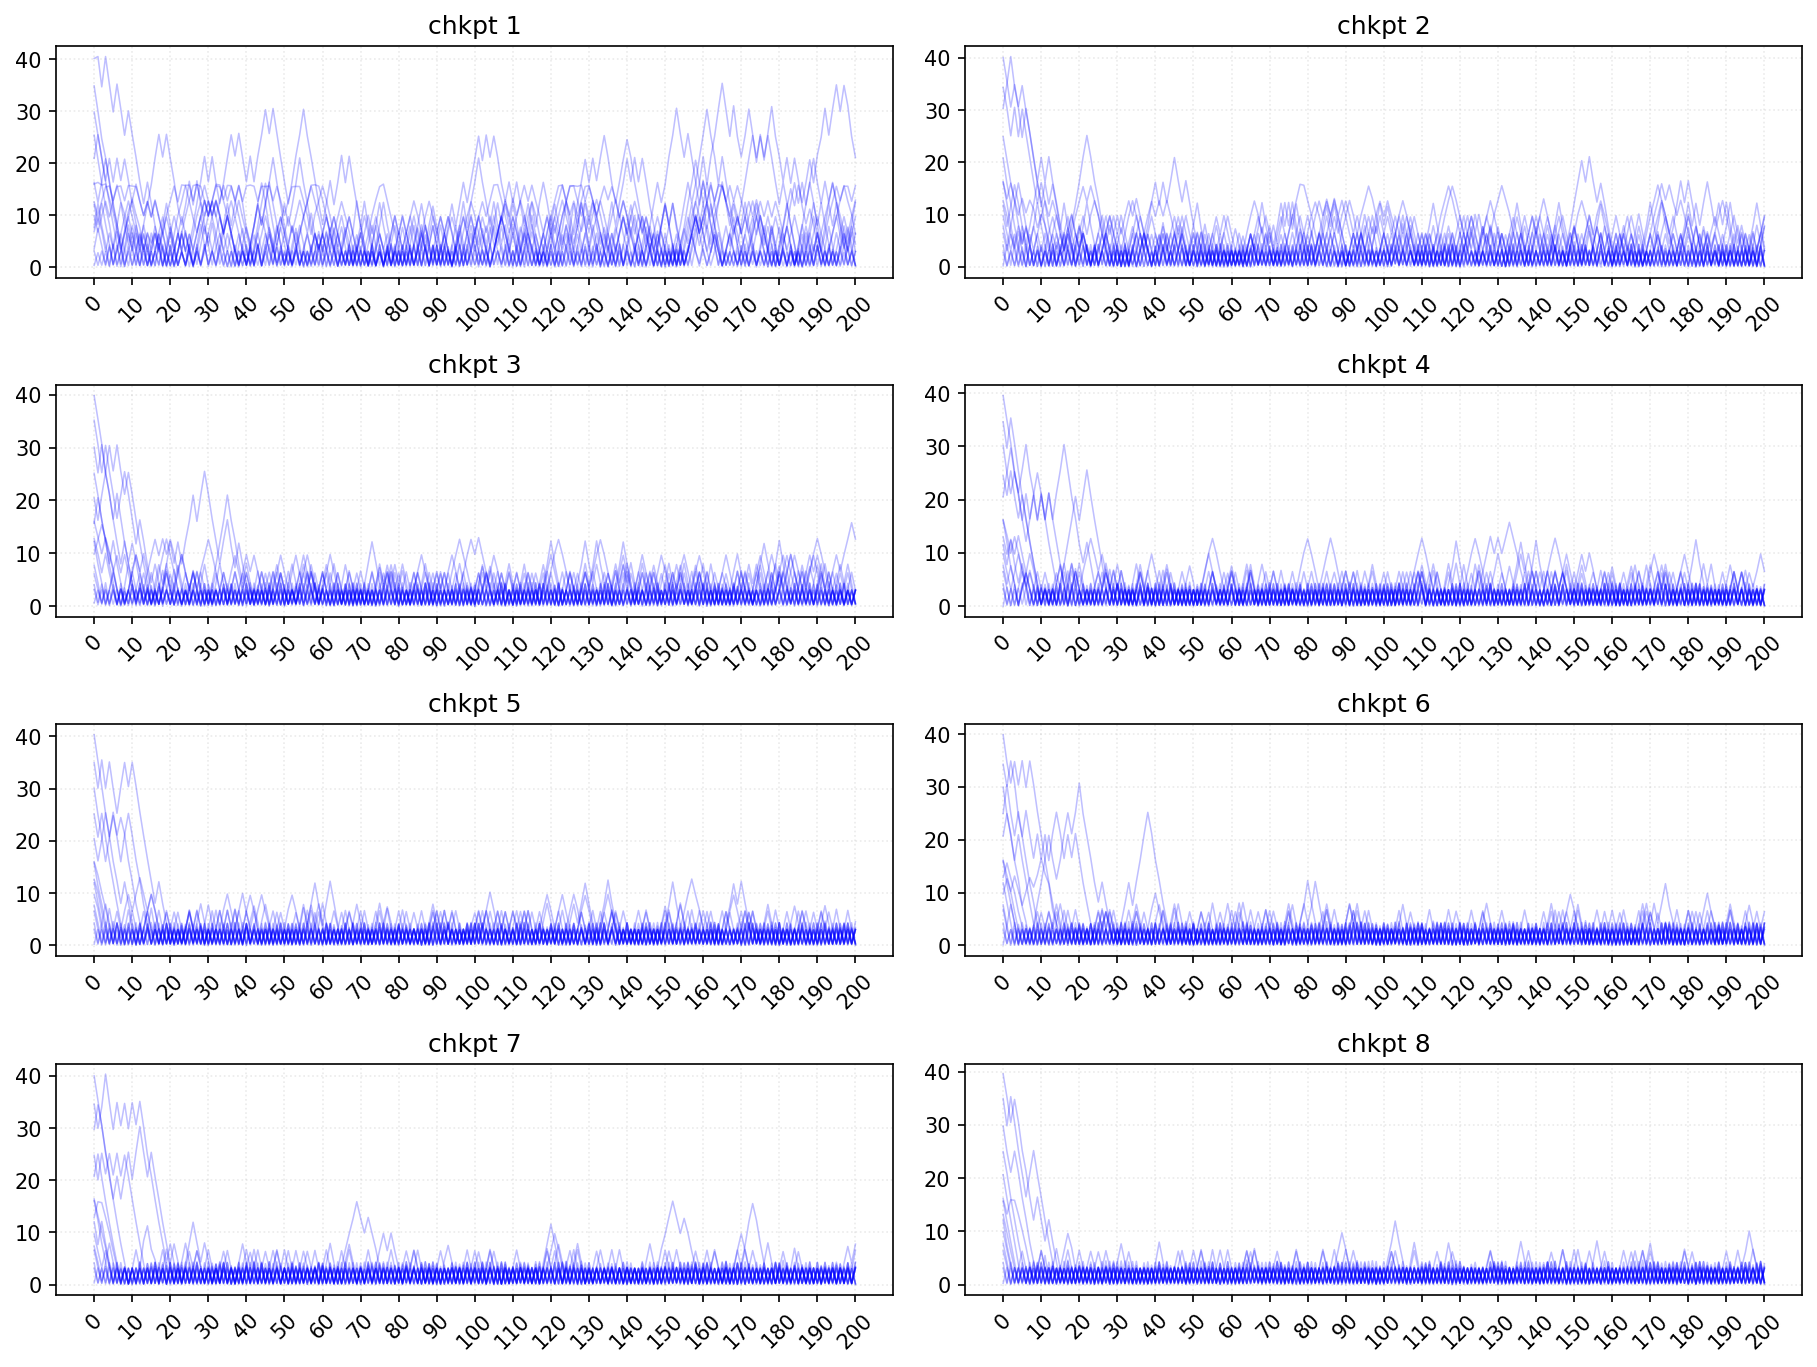

In [223]:
# Error
key = 'power'
clr = 'blue'
target = 55.5 #power
# target = 1600000 #freq
# target = 14 #state

fig, axs = plt.subplots(4, 2, figsize=(12,9), dpi=150, constrained_layout=True)
for chkpt in range(8):
    ax = axs[chkpt // 2, chkpt % 2]

    ax.set_title(f'chkpt {chkpt + 1}')

    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt + 1}/iter-{it}.csv')
        graph = []
        for value in data[key]:
            graph.append( abs(value - target) )
        
        ax.plot(
            data['Step'], graph, 
            color = clr, 
            label = f'iter {it}',
            linestyle = '-',
            linewidth = 0.75,
            marker = '',
            alpha = 0.25
        )

    #ax.set_xlabel('Step')
    ax.set_xticks(Xticks)
    ax.set_xticklabels(Xticks, rotation=45)

    #ax.set_ylabel('Power (w)')
    ax.set_yticks(Yticks[f'{key}_error'])

    ax.grid(
        alpha=0.25,
        linestyle=':',
    )

plt.savefig(f'img/chkpts.{key}.error.png', bbox_inches='tight')

In [ ]:
###################################################################

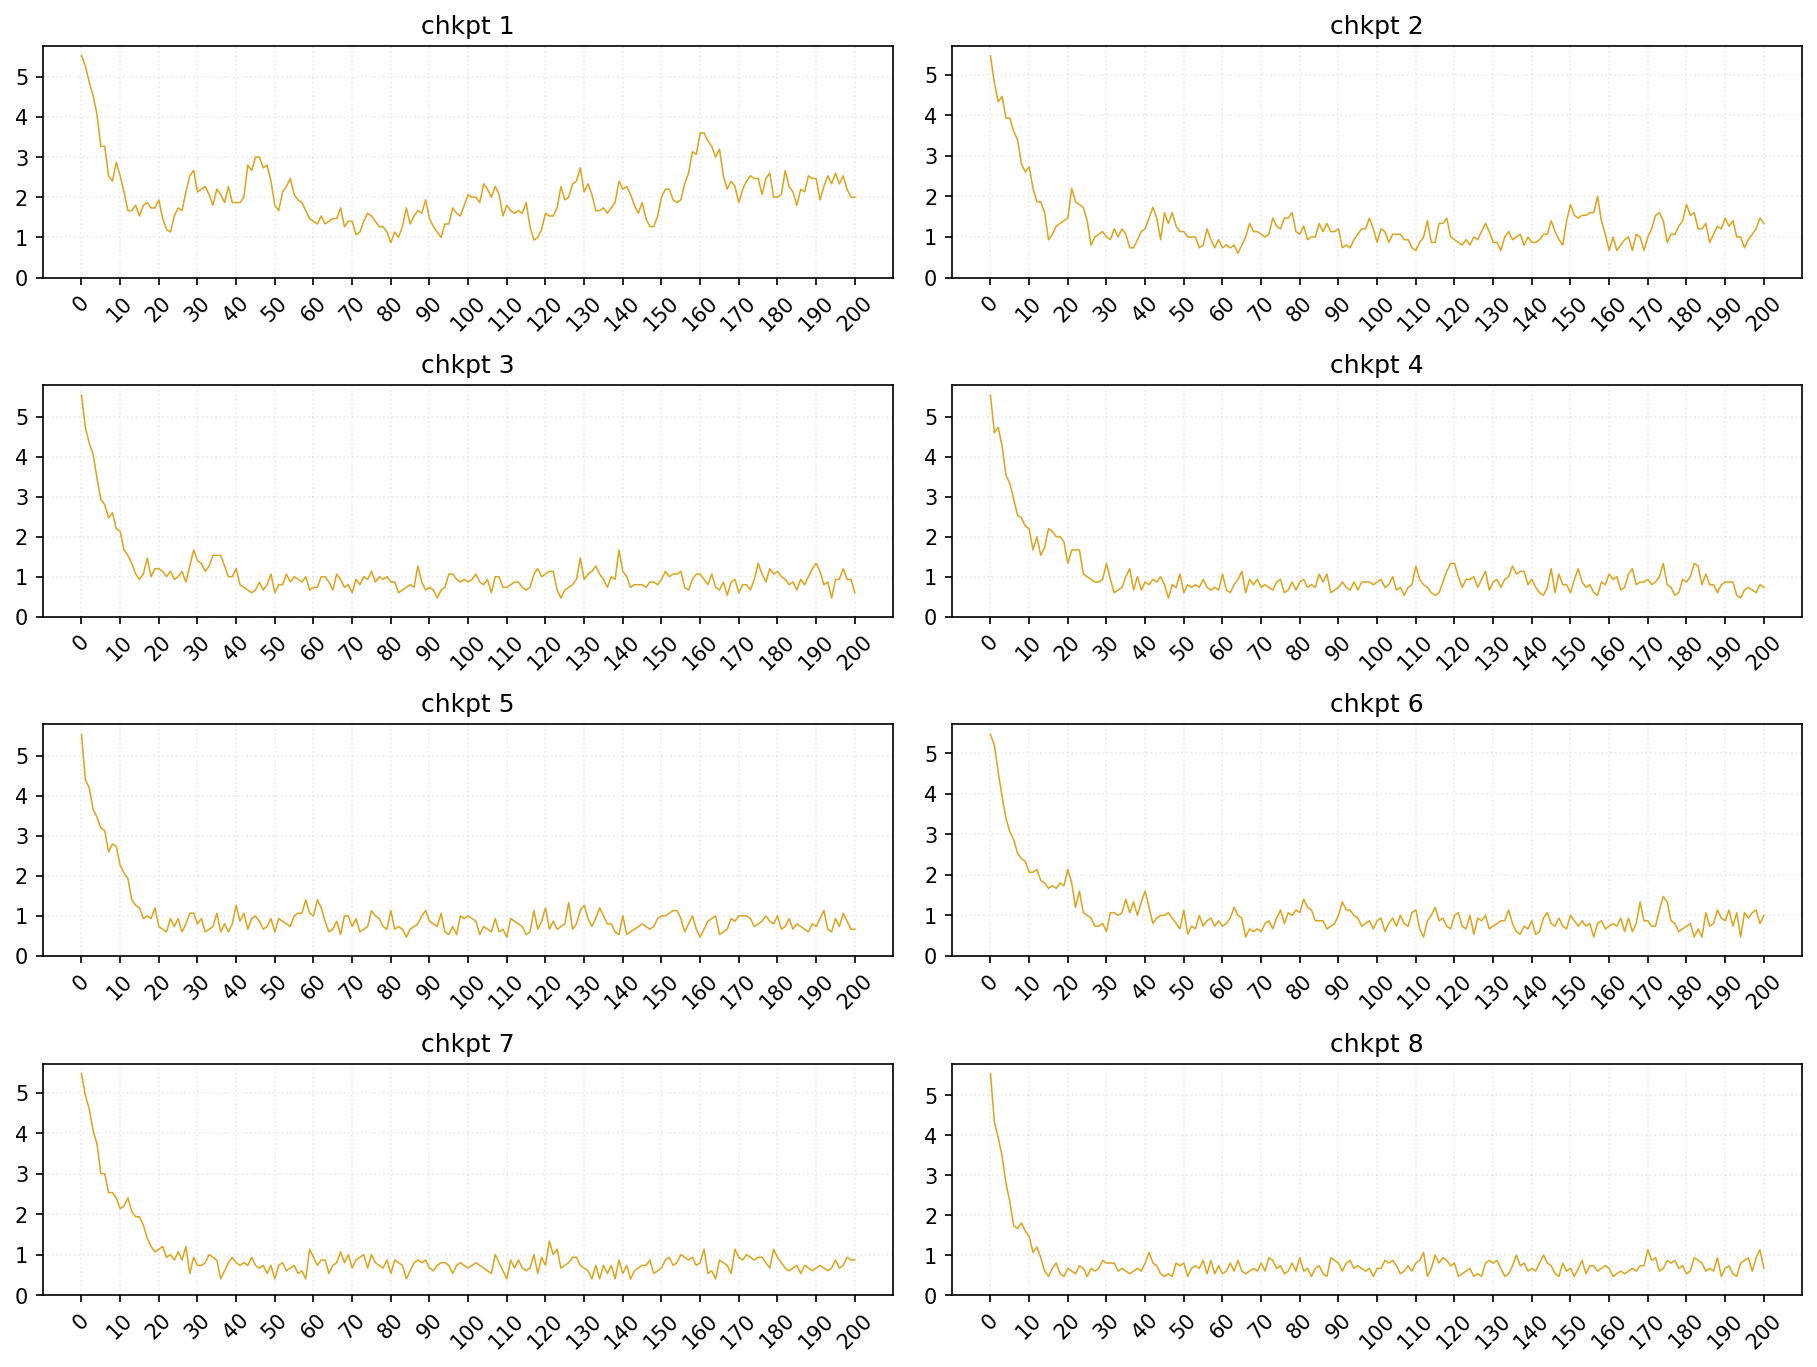

In [204]:
# Mean Error
key = 'state'
clr = 'goldenrod'
# target = 55.5 #power
# target = 1600000 #freq
target = 14 #state

fig, axs = plt.subplots(4, 2, figsize=(12,9), dpi=150, constrained_layout=True)

for chkpt in range(0,8):
    bundle = []
    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt + 1}/iter-{it}.csv')
        bundle.append([ abs(x - target) for x in data[key] ])
    bundle = np.array(bundle)
    graph = bundle.mean(axis = 0)
    #print(graph)
    #break
    
    ax = axs[chkpt // 2, chkpt % 2]

    ax.set_title(f'chkpt {chkpt + 1}')
    
    ax.plot(
            data['Step'], graph, 
            color = clr, 
            label = f'chkpt {chkpt + 1}',
            linestyle = '-',
            linewidth = 0.75,
            marker = '',
            alpha = 1.0
        )

    #ax.set_xlabel('Step')
    ax.set_xticks(Xticks)
    ax.set_xticklabels(Xticks, rotation=45)

    #ax.set_ylabel('Power (w)')
    ax.set_yticks(Yticks[f'{key}_mean_error'])

    ax.grid(
        alpha=0.25,
        linestyle=':',
    )

plt.savefig(f'img/chkpts.{key}.mean.error.png', bbox_inches='tight')

In [ ]:
###################################################################

[6.546552062842605, 3.6533482615495525, 2.8844139801883575, 2.5278221666038987, 2.3414068704731896, 2.1025849539683383, 2.071389727541286, 1.9549587930117474]


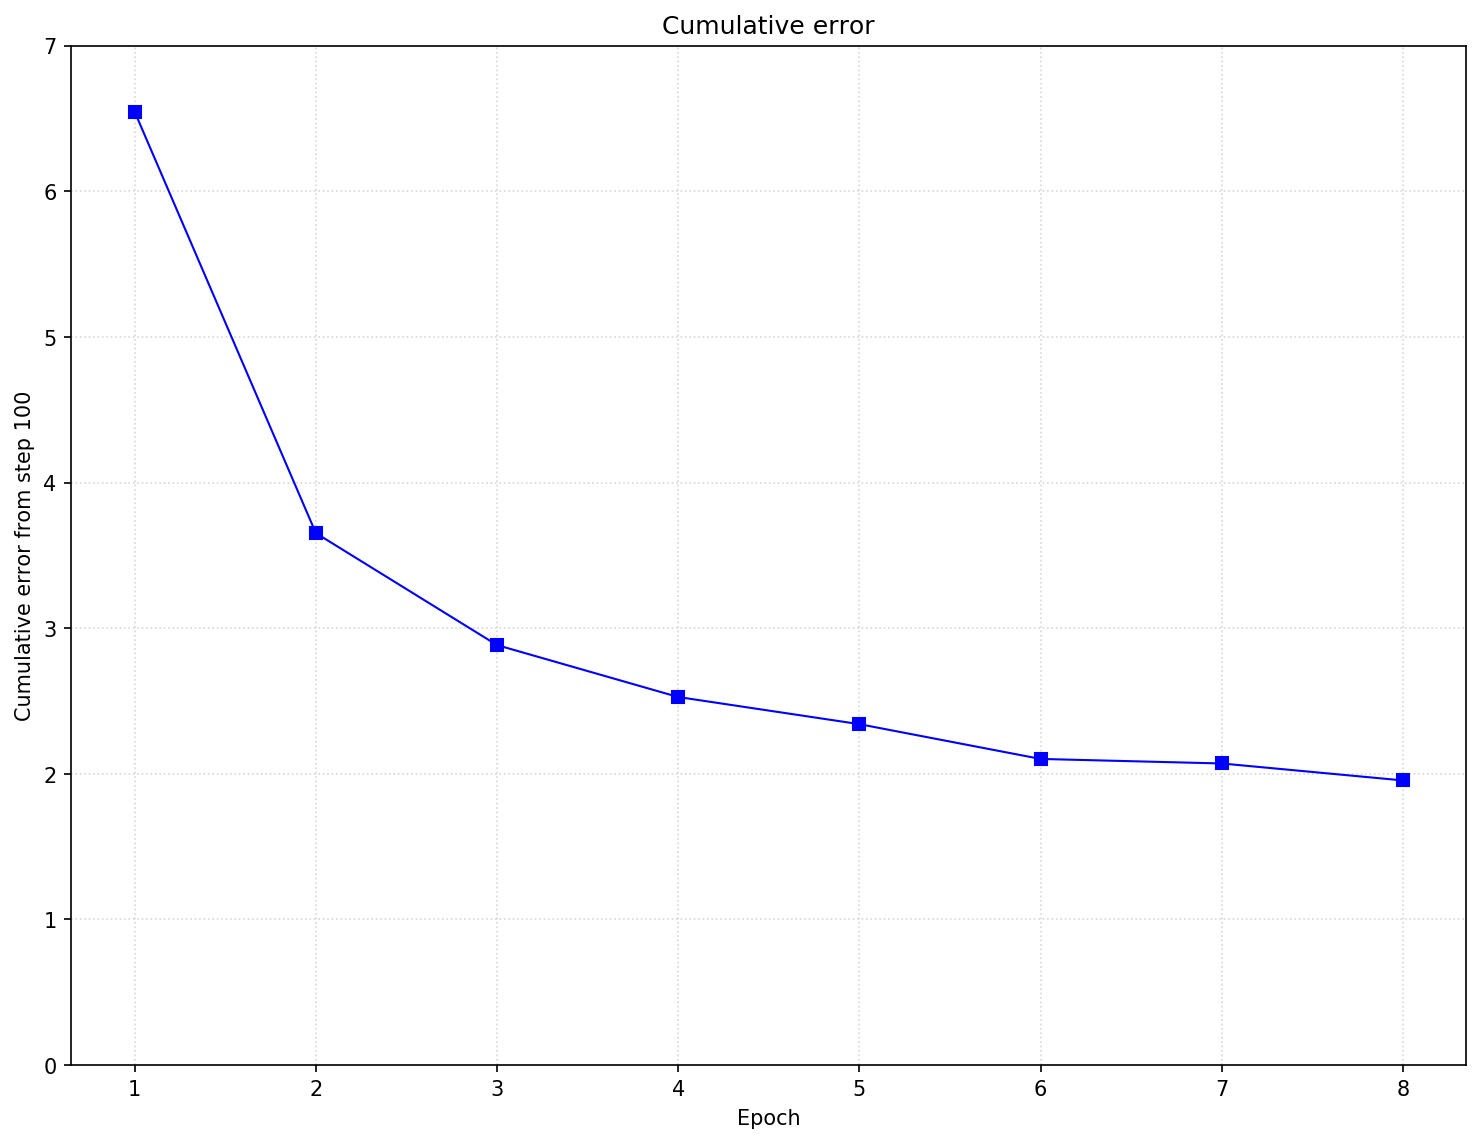

In [222]:
# Cumulative error
key = 'power'
clr = 'blue'
target = 55.5 #power
# target = 1600000 #freq
# target = 14 #state
count = 100


X = list(range(1, 9))
graph = []
for chkpt in range(0,8):
    bundle = []
    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt + 1}/iter-{it}.csv')
        bundle.append([ abs(x - target) for x in data[key] ])
    bundle = np.array(bundle)
    values = bundle.mean(axis = 0)
    graph.append( np.array(values[count:]).mean() )
    
print(graph)
    
fig = plt.figure(figsize=(12,9), dpi=150)
ax = fig.add_subplot(111)

ax.set_title(f'Cumulative error')
ax.plot(
        X, graph, 
        color = clr, 
        label = f'cumulative error',
        linestyle = '-',
        linewidth = 1.0,
        marker = 's',
        alpha = 1.0
    )

ax.set_xlabel('Epoch')
ax.set_xticks(X)
ax.set_xticklabels(X)

ax.set_ylabel(f'Cumulative error from step {count}')
ax.set_yticks(np.arange(0, 8, 1))

ax.grid(
    alpha=0.50,
    linestyle=':',
)

plt.savefig(f'img/chkpts.{key}.cum.error.png', bbox_inches='tight')

In [ ]:
###################################################################
###################################################################

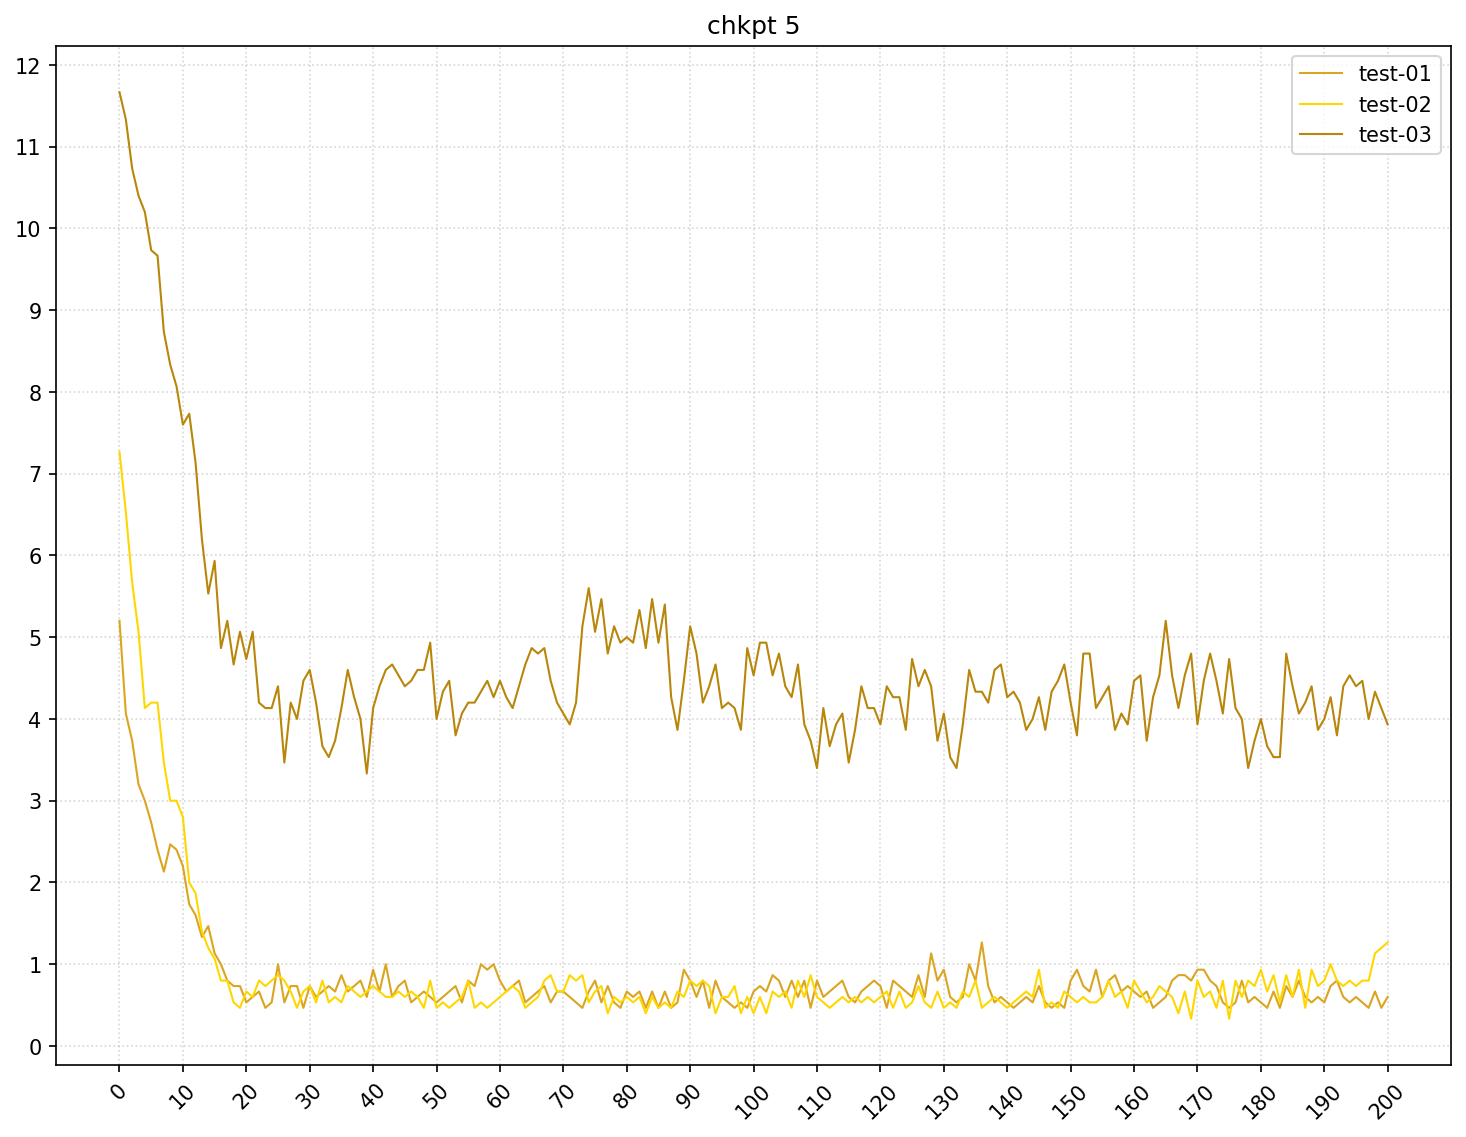

In [75]:
# Inter-test mean error (1 checkpoint)
key = 'state'
#clrs = ['blue', 'cyan', 'midnightblue'] #power
#targets = [55.5, 42.5, 100.0] #power

#clrs = ['red', 'deeppink', 'darkred']
#targets = [1600000, 1200000, 2600000] #freq

clrs = ['goldenrod', 'gold', 'darkgoldenrod']
targets = [15, 11, 30] #freq

chkpt = 5
tests = ['test-01', 'test-02', 'test-03']

fig = plt.figure(figsize=(12,9), dpi=150)

ax = fig.add_subplot(111)
ax.set_title(f'chkpt {chkpt}')

for test, clr, target in zip(tests, clrs, targets):
    bundle = []
    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt}/iter-{it}.csv', path = test + '/')
        bundle.append([ abs(x - target) for x in data[key] ])
    bundle = np.array(bundle)
    graph = bundle.mean(axis = 0)
    
    ax.plot(
        data['Step'], graph, 
        color = clr, 
        label = test,
        linestyle = '-',
        linewidth = 1.0,
        marker = '',
        alpha = 1.0
    )

#ax.set_xlabel('Step')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

#ax.set_ylabel('Power (w)')
ax.set_yticks(Yticks[f'{key}_mean_error'])

ax.grid(
    alpha=0.50,
    linestyle=':',
)
ax.legend()

figpath = f'img/chkpt-{chkpt}.{key}.mean.error.png'
plt.savefig(figpath, bbox_inches='tight')

[0.6765676567656765, 0.6448844884488449, 4.217161716171616]


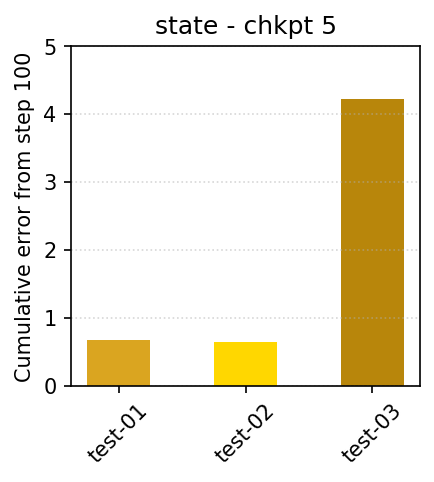

In [110]:
# Inter-test cumulative error (1 checkpoint)
key = 'state'
#clrs = ['blue', 'cyan', 'midnightblue'] #power
#targets = [55.5, 42.5, 100.0] #power

#clrs = ['red', 'deeppink', 'darkred']
#targets = [1600000, 1200000, 2600000] #freq

clrs = ['goldenrod', 'gold', 'darkgoldenrod']
targets = [15, 11, 30] #freq

chkpt = 5
tests = ['test-01', 'test-02', 'test-03']

fig = plt.figure(figsize=(3,3), dpi=150)

ax = fig.add_subplot(111)
ax.set_title(f'{key} - chkpt {chkpt}')

count = 100

graph = []
for test, target in zip(tests, targets):
    bundle = []
    for it in range(15):
        data = get_file_data(f'checkpoint-{chkpt}/iter-{it}.csv', path = test + '/')
        bundle.append([ abs(x - target) for x in data[key] ])
    bundle = np.array(bundle)
    values = bundle.mean(axis = 0)
    graph.append( np.array(values[count:]).mean() )
    
ax.bar(
    [1,2,3], graph, 
    color = clrs, 
    linestyle = '-',
    width = 0.5,
    alpha = 1.0
)
print(graph)

#ax.set_xlabel('Step')
ax.set_xticks([1,2,3])
ax.set_xticklabels(tests, rotation=45)

ax.set_ylabel(f'Cumulative error from step {count}')
ax.set_yticks(Yticks[f'{key}_mean_error'])

ax.grid(
    alpha=0.50,
    axis='y',
    linestyle=':',
)

figpath = f'img/chkpt-{chkpt}.{key}.mean.error.cum.png'
plt.savefig(figpath, bbox_inches='tight')